# Omdena  - Milan Chapter Agrifoods
## AI for Sustainable agri-food systems: use of Satellite Imagery
###  Maps of cereals production in Italy 2020-2022
#### Author: Maria Fisher 


Here we have analysed the major areas and crop produced in Italy. 
Crop dataset used in this study was downloaded from the Italian National Institute of Statistics (Istat).
The objective is to get some insights about crop production and its respective areas in Italy and how climate change have affected crop production in the last 3 years. 
Maps was created with dataset from Simone Rigoni, the address to the repository of the dataset i avaialbe in References.   


In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 
import scipy 
import sklearn
import geopandas as gpd
import pgeocode
import folium
import sys
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [2]:
cereals = pd.read_csv('Italy_crop_data/italy_cereals.csv')
cereals.head()

,ITTER107,Territory,TIPO_DATO5,Data type,AGRI_MADRE,Type of crop,TIME,Select time,Value,Flag Codes,Flags
0,ITC11,Torino,ART,total area - hectares,COMMEAT,common wheat,2020,2020,15362,NaN,NaN
1,ITC11,Torino,ART,total area - hectares,COMMEAT,common wheat,2021,2021,16831,NaN,NaN
2,ITC11,Torino,ART,total area - hectares,COMMEAT,common wheat,2022,2022,16735,NaN,NaN
3,ITC12,Vercelli,ART,total area - hectares,COMMEAT,common wheat,2020,2020,1285,NaN,NaN
4,ITC12,Vercelli,ART,total area - hectares,COMMEAT,common wheat,2021,2021,1491,NaN,NaN


In [3]:
cereals = cereals.drop(columns =['ITTER107','TIPO_DATO5','AGRI_MADRE', 'TIME', 'Flag Codes','Flags' ])
cereals

,Territory,Data type,Type of crop,Select time,Value
0,Torino,total area - hectares,common wheat,2020,15362
1,Torino,total area - hectares,common wheat,2021,16831
2,Torino,total area - hectares,common wheat,2022,16735
3,Vercelli,total area - hectares,common wheat,2020,1285
4,Vercelli,total area - hectares,common wheat,2021,1491
...,...,...,...,...,...
4767,Pesaro e Urbino,total area - hectares,rye and winter cereal mixtures (maslin),2022,3
4768,Roma,total area - hectares,rye and winter cereal mixtures (maslin),2022,20
4769,Valle d'Aosta / Vallée d'Aoste,total area - hectares,winter barley,2022,1
4770,Torino,total area - hectares,spring barley,2022,220


In [4]:
cereals = cereals.rename(columns = {'Select time':'Year', 'Type of crop':'Type_crop', 'Data type':'Data_type', 'Territory':'City'})


## Subseting data

In [13]:
cereals_top10 = cereals.apply(lambda row: row[cereals['Type_crop'].isin(['winter cereal mixtures (maslin)','potatoes','barley','oats', 
                                         'durum wheat','common wheat', 'grain maize', 'chick-peas',
                                                   'broad bean', 'rice'])])

cereals_top10.head()

,City,Data_type,Type_crop,Year,Value
0,Torino,total area - hectares,common wheat,2020,15362
1,Torino,total area - hectares,common wheat,2021,16831
2,Torino,total area - hectares,common wheat,2022,16735
3,Vercelli,total area - hectares,common wheat,2020,1285
4,Vercelli,total area - hectares,common wheat,2021,1491


# Maps

In [19]:

italy_latlong = gpd.read_file('italy_lat_long.csv')
italy_latlong.head()

,Geoname ID,Name,ASCII Name,Alternate Names,Feature Class,Feature Code,Country Code,Country name EN,Country Code 2,Admin1 Code,...,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,LABEL EN,Coordinates,geometry
0,2522743,Villanovaforru,Villanovaforru,Villanovaforru,P,PPLA3,IT,Italy,,14,...,111100,,674,310,306,Europe/Rome,2018-02-10,Italy,"39.63196,8.86979",None
1,2522812,Vaccarizzo Albanese,Vaccarizzo Albanese,"Vaccarizzo Albanese,Vakarici",P,PPLA3,IT,Italy,,03,...,078152,,1030,448,432,Europe/Rome,2014-01-11,Italy,"39.5854,16.43289",None
2,2522957,Terranova di Pollino,Terranova di Pollino,Terranova di Pollino,P,PPLA3,IT,Italy,,02,...,076088,,1089,926,863,Europe/Rome,2014-04-13,Italy,"39.97765,16.29583",None
3,2522982,Surdo,Surdo,,P,PPL,IT,Italy,,03,...,078102,,1659,,257,Europe/Rome,2016-11-13,Italy,"39.32752,16.20139",None
4,2523147,Serra Pedace,Serra Pedace,"Serra,Serra Pedace",P,PPLA3,IT,Italy,IT,03,...,078156,,972,726,760,Europe/Rome,2017-09-07,Italy,"39.27898,16.34557",None


In [20]:
italy_latlong = italy_latlong.drop(columns=['Geoname ID','ASCII Name','Alternate Names','Feature Class','Feature Code','Country Code','Admin2 Code','Country Code 2',
                                            'Admin1 Code','Admin3 Code','Admin4 Code','Population','Elevation',
                                            'DIgital Elevation Model','Timezone','Modification date','LABEL EN','geometry'])
italy_latlong.head()

,Name,Country name EN,Coordinates
0,Villanovaforru,Italy,"39.63196,8.86979"
1,Vaccarizzo Albanese,Italy,"39.5854,16.43289"
2,Terranova di Pollino,Italy,"39.97765,16.29583"
3,Surdo,Italy,"39.32752,16.20139"
4,Serra Pedace,Italy,"39.27898,16.34557"


In [21]:
# Separate Latidute and Longitude into two columns 
lat = []
lon = []

for row in italy_latlong['Coordinates']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

italy_latlong['latitude'] = lat
italy_latlong['longitude'] = lon


In [22]:
italy_latlong.head()

,Name,Country name EN,Coordinates,latitude,longitude
0,Villanovaforru,Italy,"39.63196,8.86979",39.63196,8.86979
1,Vaccarizzo Albanese,Italy,"39.5854,16.43289",39.5854,16.43289
2,Terranova di Pollino,Italy,"39.97765,16.29583",39.97765,16.29583
3,Surdo,Italy,"39.32752,16.20139",39.32752,16.20139
4,Serra Pedace,Italy,"39.27898,16.34557",39.27898,16.34557


In [23]:
italy_latlong = italy_latlong.drop(columns=['Coordinates'])
italy_latlong

,Name,Country name EN,latitude,longitude
0,Villanovaforru,Italy,39.63196,8.86979
1,Vaccarizzo Albanese,Italy,39.5854,16.43289
2,Terranova di Pollino,Italy,39.97765,16.29583
3,Surdo,Italy,39.32752,16.20139
4,Serra Pedace,Italy,39.27898,16.34557
...,...,...,...,...
9942,Dalmine,Italy,45.64933,9.60617
9943,Conselice,Italy,44.51163,11.82848
9944,Concordia Sagittaria,Italy,45.76118,12.82362
9945,Comazzo,Italy,45.4419,9.46278


In [24]:
# Change NAME_2 column to Region, to match the name of the column in cereals dataset in order to join both datasets  
italy_latlong  = italy_latlong.rename (columns ={'Name':'City', 'Country name EN':'Country'}) 
italy_latlong.head()


,City,Country,latitude,longitude
0,Villanovaforru,Italy,39.63196,8.86979
1,Vaccarizzo Albanese,Italy,39.5854,16.43289
2,Terranova di Pollino,Italy,39.97765,16.29583
3,Surdo,Italy,39.32752,16.20139
4,Serra Pedace,Italy,39.27898,16.34557


In [25]:
italy_latlong.City.unique()

array(['Villanovaforru', 'Vaccarizzo Albanese', 'Terranova di Pollino',
       ..., 'Concordia Sagittaria', 'Comazzo', 'Comacchio'], dtype=object)

In [26]:
# Visualize shapefile 
italy_shape = gpd.read_file('ITA_adm/ITA_adm2.shp')
italy_shape.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,112,ITA,Italy,1,Abruzzo,1,Chieti,IT.CH,0,69,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,112,ITA,Italy,1,Abruzzo,2,L'Aquila,IT.AQ,0,66,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,112,ITA,Italy,1,Abruzzo,3,Pescara,IT.PE,0,68,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,112,ITA,Italy,1,Abruzzo,4,Teramo,IT.TE,0,67,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,112,ITA,Italy,2,Apulia,5,Bari,IT.BB,0,72,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."


In [27]:
# Remove coluns that are not relevant to the present study
italy_shape = italy_shape.drop(columns=['ID_0','ISO','NAME_0','ID_1','ID_2','HASC_2','CCN_2','CCA_2','TYPE_2','ENGTYPE_2','NL_NAME_2','VARNAME_2'])
italy_shape

,NAME_1,NAME_2,geometry
0,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,Abruzzo,L'Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,Abruzzo,Pescara,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,Abruzzo,Teramo,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,Apulia,Bari,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."
...,...,...,...
108,Veneto,Rovigo,"MULTIPOLYGON (((12.41680 44.82903, 12.41680 44..."
109,Veneto,Treviso,"POLYGON ((12.35548 46.07705, 12.36288 46.07249..."
110,Veneto,Venezia,"MULTIPOLYGON (((12.33236 45.16403, 12.33236 45..."
111,Veneto,Verona,"POLYGON ((10.87383 45.78948, 10.87461 45.78907..."


In [28]:
# Change NAME_2 column to Region, to match the name of the column in cereals dataset in order to join both datasets  
italy_shape = italy_shape.rename (columns ={'NAME_1':'Region', 'NAME_2':'City'}) 
italy_shape

,Region,City,geometry
0,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,Abruzzo,L'Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,Abruzzo,Pescara,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,Abruzzo,Teramo,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,Apulia,Bari,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."
...,...,...,...
108,Veneto,Rovigo,"MULTIPOLYGON (((12.41680 44.82903, 12.41680 44..."
109,Veneto,Treviso,"POLYGON ((12.35548 46.07705, 12.36288 46.07249..."
110,Veneto,Venezia,"MULTIPOLYGON (((12.33236 45.16403, 12.33236 45..."
111,Veneto,Verona,"POLYGON ((10.87383 45.78948, 10.87461 45.78907..."


<AxesSubplot: >

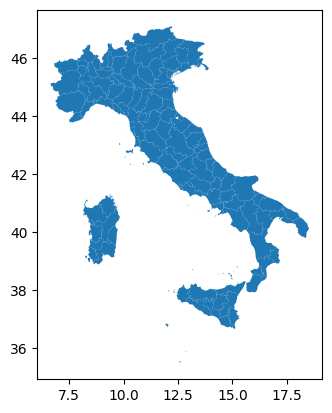

In [29]:
# Plot shape of the country
italy_shape.plot()

In [30]:
# Join both datasets 
italy = pd.merge(italy_shape, italy_latlong, on='City', how='left')
italy.head()


,Region,City,geometry,Country,latitude,longitude
0,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494
1,Abruzzo,L'Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468...",Italy,42.35055,13.39954
2,Abruzzo,Pescara,"POLYGON ((14.07483 42.54282, 14.07576 42.54278...",Italy,42.4584,14.20283
3,Abruzzo,Teramo,"POLYGON ((13.91542 42.89561, 13.91542 42.89542...",Italy,42.66123,13.69901
4,Apulia,Bari,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40...",Italy,41.12066,16.86982


In [31]:
# Join both datasets 
italy = pd.merge(italy, cereals2022, on='City', how='left')
italy


,Region,City,geometry,Country,latitude,longitude,Data_type,Type_crop,Year,Value
0,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494,total area - hectares,common wheat,2022.0,1900.0
1,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494,total area - hectares,barley,2022.0,1830.0
2,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494,total area - hectares,grain pea,2022.0,4.0
3,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494,total area - hectares,chick-peas,2022.0,710.0
4,Abruzzo,Chieti,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Italy,42.34827,14.16494,total area - hectares,oats,2022.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
1506,Veneto,Vicenza,"POLYGON ((11.51375 46.01117, 11.51822 46.01009...",Italy,45.54672,11.5475,total area - hectares,titicale,2022.0,36.0
1507,Veneto,Vicenza,"POLYGON ((11.51375 46.01117, 11.51822 46.01009...",Italy,45.54672,11.5475,total area - hectares,common winter wheat and spelt,2022.0,7990.0
1508,Veneto,Vicenza,"POLYGON ((11.51375 46.01117, 11.51822 46.01009...",Italy,45.54672,11.5475,total area - hectares,rye and winter cereal mixtures (maslin),2022.0,6.0
1509,Veneto,Vicenza,"POLYGON ((11.51375 46.01117, 11.51822 46.01009...",Italy,45.54672,11.5475,total area - hectares,winter barley,2022.0,2797.0
